In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Problem 2: Clustering senators

In this problem, you will use the voting history from the 114th Congress to split Senators into clusters.

In [2]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/114_congress.csv'
data = pd.read_csv(url)
data.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


The data contains all the votes from the 114th Senate.
Each row contains the votes of an individual senator. 
Votes are coded as 0 for “No”, 1 for “Yes”, and 0.5 for “Abstain”.

In [3]:
# feature matrix X
X = data.drop(['name','party','state'],axis=1)

**Part 1:** Use `AgglomerativeClustering` (with ward linkage) to split the senators into two clusters.
Do the two clusters correspond to the two parties?

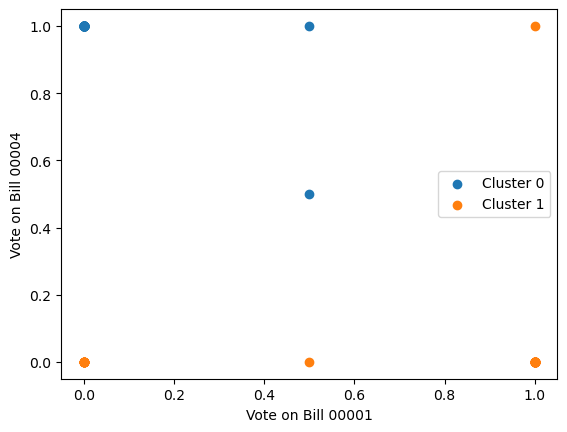

In [35]:
from sklearn.cluster import AgglomerativeClustering

k = 2
aggclt = AgglomerativeClustering(n_clusters = k, linkage='ward')
aggclt.fit(X)
# cluster labels
labels = aggclt.labels_
# # plot clusters
for i in range(k):
    cluster_indices = labels == i
    plt.scatter(X.iloc[cluster_indices, 0], X.iloc[cluster_indices, 1], label=f"Cluster {i}")

plt.xlabel('Vote on Bill 00001')
plt.ylabel('Vote on Bill 00004')
plt.legend()
plt.show()

**Part 2:** Find the senators that are in the cluster associated with the opposite party

In [38]:
# (i.e., the cluster that contains the most senators from the opposite party).
# These senators are the most likely to vote across party lines.

# Add cluster labels to the original DataFrame
data['cluster'] = aggclt.labels_

# Determine the majority party in each cluster
majority_party_in_clusters = data.groupby('cluster')['party'].agg(lambda x: x.value_counts().idxmax())

# Find senators who are in the cluster predominantly composed of the opposite party
opposite_party_senators = []
for cluster, majority_party in majority_party_in_clusters.items():
    opposite_party = 'D' if majority_party == 'R' else 'R'
    opposite_party_senators_in_cluster = data[(data['cluster'] == cluster) & (data['party'] == opposite_party)]
    opposite_party_senators.append(opposite_party_senators_in_cluster)

# Combine data from both clusters
opposite_party_senators_df = pd.concat(opposite_party_senators)

print(opposite_party_senators_df[['name', 'party', 'cluster']])

        name party  cluster
42  Heitkamp     D        0
56   Manchin     D        0
74      Reid     D        0


**Part 3:** More clusters could show wings of each party, or cross-party groups.
Use AgglomerativeClustering (with ward linkage) to split the senators into 5 clusters, and analyze the two democratic factions

**Part 4:** Plot the hierarchical clustering dendrogram